## Import required packages:

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

## Read the data:

In [2]:
df = pd.read_csv('lending_club_loan_two.csv')
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  \
0                Marketing  10+ years           RENT    117000.0   
1          Credit analyst     4 years       MORTGAGE     65000.0   
2             Statistician   < 1 year           RENT     43057.0   
3          Client Advocate    6 years           RENT     54000.0   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0   

  verification_status   issue_d  loan_status             purpose  \
0        Not Verified  Jan-2015   Fully Paid            vacation   
1        Not Verified  Jan-2015   Fully Paid  debt_consolidation   
2     Source Verified  Jan-2015   Fully Paid         credit_card   
3        Not Verified  Nov-2014   Fully Paid         credit_card   
4            Verified  Apr-2013  Charged Off         credit_card   

                     title    dti earliest_cr_line  open_acc  pub_rec  \
0                 Vacation  26.24         Jun-1990      16.0      0.0   
1       Debt consolidation  22.05         Jul-2004      17.0      0.0   
2  Credit card refinancing  12.79         Aug-2007      13.0      0.0   
3  Credit card refinancing   2.60         Sep-2006       6.0      0.0   
4    Credit Card Refinance  33.95         Mar-1999      13.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0    36369.0        41.8       25.0                   w       INDIVIDUAL   
1    20131.0        53.3       27.0                   f       INDIVIDUAL   
2    11987.0        92.2       26.0                   f       INDIVIDUAL   
3     5472.0        21.5       13.0                   f       INDIVIDUAL   
4    24584.0        69.8       43.0                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies  \
0       0.0                   0.0   
1       3.0                   0.0   
2       0.0                   0.0   
3       0.0                   0.0   
4       1.0                   0.0   

                                           address  
0     0174 Michelle Gateway\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113  
3            823 Reid Ford\nDelacruzside, MA 00813  
4             679 Luna Roads\nGreggshire, VA 11650

## Exploratory Data Analysis (EDA):

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Counting variables by Data type:

In [4]:
df.dtypes.value_counts()

object     15
float64    12
dtype: int64

In [5]:
## Statistical Summary of Numerical Variables of the data set
df.describe()

loan_amnt       int_rate    installment    annual_inc  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean    14113.888089      13.639400     431.849698  7.420318e+04   
std      8357.441341       4.472157     250.727790  6.163762e+04   
min       500.000000       5.320000      16.080000  0.000000e+00   
25%      8000.000000      10.490000     250.330000  4.500000e+04   
50%     12000.000000      13.330000     375.430000  6.400000e+04   
75%     20000.000000      16.490000     567.300000  9.000000e+04   
max     40000.000000      30.990000    1533.810000  8.706582e+06   

                 dti       open_acc        pub_rec     revol_bal  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean       17.379514      11.311153       0.178191  1.584454e+04   
std        18.019092       5.137649       0.530671  2.059184e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%        11.280000       8.000000       0.000000  6.025000e+03   
50%        16.910000      10.000000       0.000000  1.118100e+04   
75%        22.980000      14.000000       0.000000  1.962000e+04   
max      9999.000000      90.000000      86.000000  1.743266e+06   

          revol_util      total_acc       mort_acc  pub_rec_bankruptcies  
count  395754.000000  396030.000000  358235.000000         395495.000000  
mean       53.791749      25.414744       1.813991              0.121648  
std        24.452193      11.886991       2.147930              0.356174  
min         0.000000       2.000000       0.000000              0.000000  
25%        35.800000      17.000000       0.000000              0.000000  
50%        54.800000      24.000000       1.000000              0.000000  
75%        72.900000      32.000000       3.000000              0.000000  
max       892.300000     151.000000      34.000000              8.000000

## Observations:
- Higest loan amount is 40000
- Highest interest rate is 30.99%

## Counting missing values in dataset:

In [6]:
features_with_NA =[features for features in df.columns if df[features].isnull().sum() >1]

features_with_NA

['emp_title',
 'emp_length',
 'title',
 'revol_util',
 'mort_acc',
 'pub_rec_bankruptcies']

In [7]:
for feature in features_with_NA:
    print(f"{feature} = {round(df[feature].isna().sum()*100/len(df),2)} % \n")

emp_title = 5.79 % 

emp_length = 4.62 % 

title = 0.44 % 

revol_util = 0.07 % 

mort_acc = 9.54 % 

pub_rec_bankruptcies = 0.14 % 



# Analysis of target variable =

### - `Loan Status : Current status of the the loan.`

In [8]:
# To get extact count we have used valuecounts method -
df["loan_status"].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

<Axes: ylabel='loan_status'>

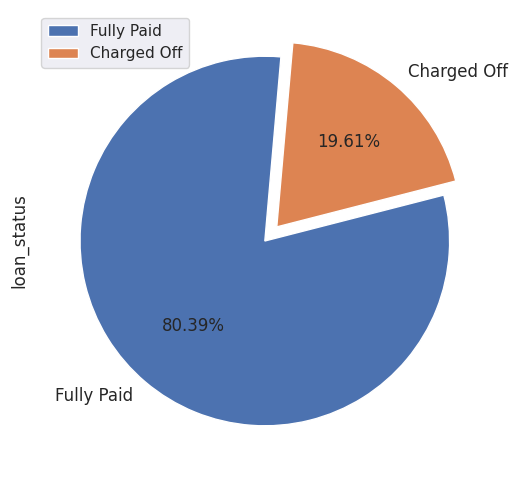

In [9]:
# pie chart
# with better visualization with value percentage in each categories we have used pie chart-

df['loan_status'].value_counts().plot(kind='pie',legend=True, startangle=85, fontsize=12, figsize=(14,6),autopct='%1.2f%%',explode= (0, 0.1))

## Obsevations:
- We have data for loan status in ratio of 80 to 20.
- Dataset is highly imbalanced.
- Dataset will be baised towards fully paid since we have more cases for fully paid category than charged off.

## Checking correlations =

/tmp/ipykernel_4743/3594544028.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

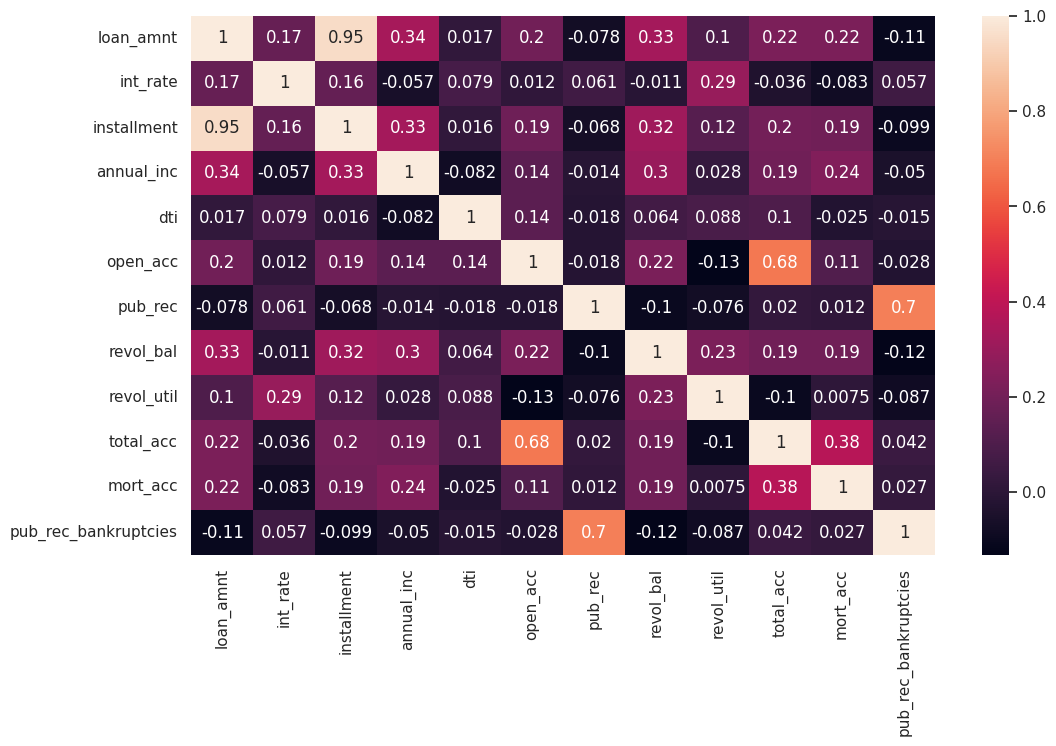

In [10]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True)

## Observations:
- It has only plotted for numerical variables-
- There is strong correlation between installment and loan_amount.
- mort acc is +vely correlated with total acc, the correlation is not much high.
- pub_rec_bankruptcies is strongly correlated with pub_rec.(0.7).higher the derogatry records higher the bankrupcies
- total_acc is also correlated with open_acc(0.68)(higher the open credit lines higher will be the ratio total accredation ratio)
- also there is small correlation between annul_inc and installment
- there is large corelation between the loan amount and installment


##### `For better understanding we have created jointplot of loan amount and installment-`

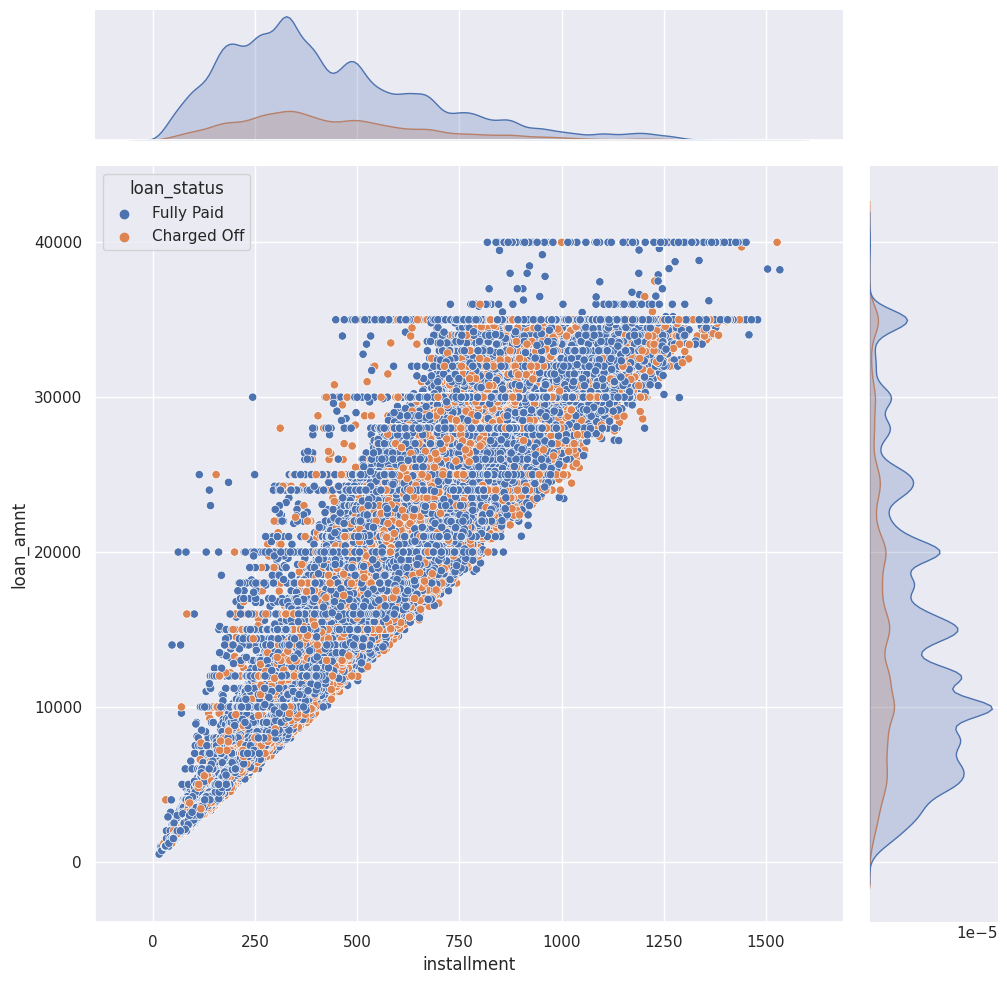

In [11]:
sns.jointplot(x="installment", y="loan_amnt", data=df, hue='loan_status', height=10)

# Observations-
- Loan amount and installment has linear relationship.
- But Loan installment amount is different for same loan amount.
- It may be because loan installment is calculated using some kind of formula which take loan amount, time period and other factors into consideraion.

## visualising distrubution of loan amount-

<Axes: xlabel='loan_amnt', ylabel='Count'>

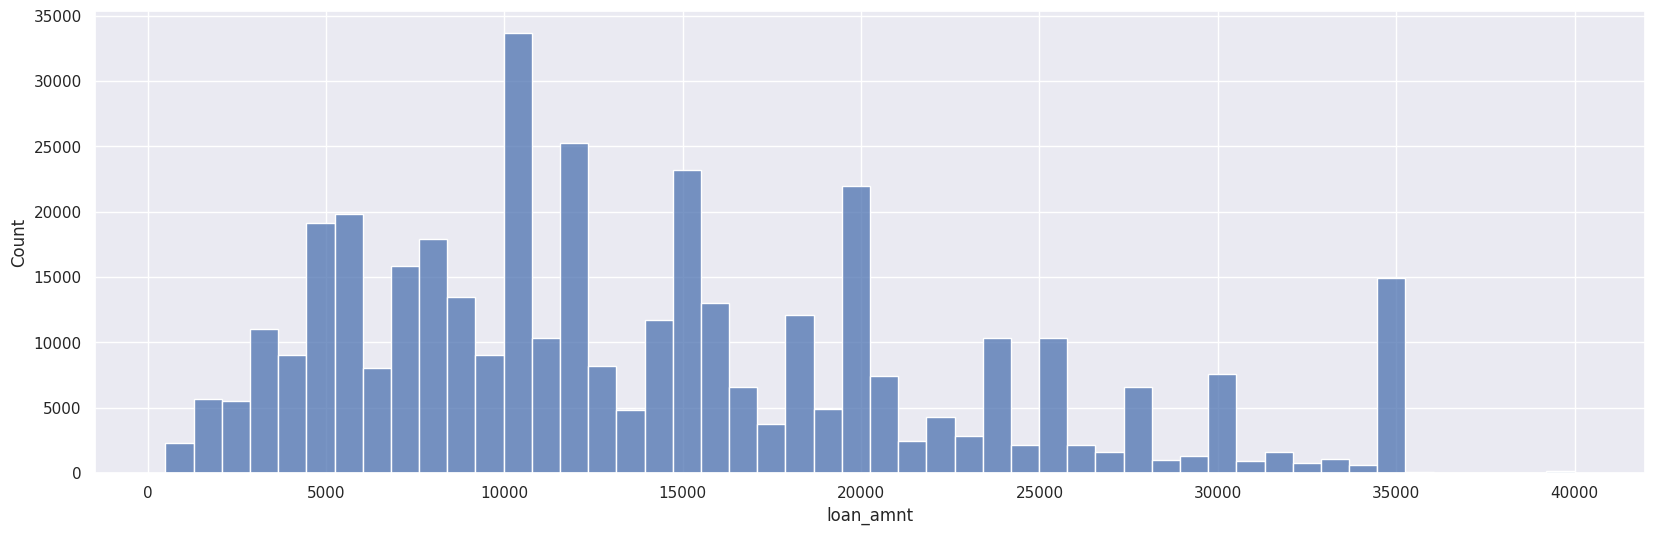

In [12]:
# continious variable - we will use histogram-

plt.figure(figsize=(20,6))
sns.histplot(df['loan_amnt'], bins=50)

## visualising distrubution of installments -

<Axes: xlabel='installment', ylabel='Count'>

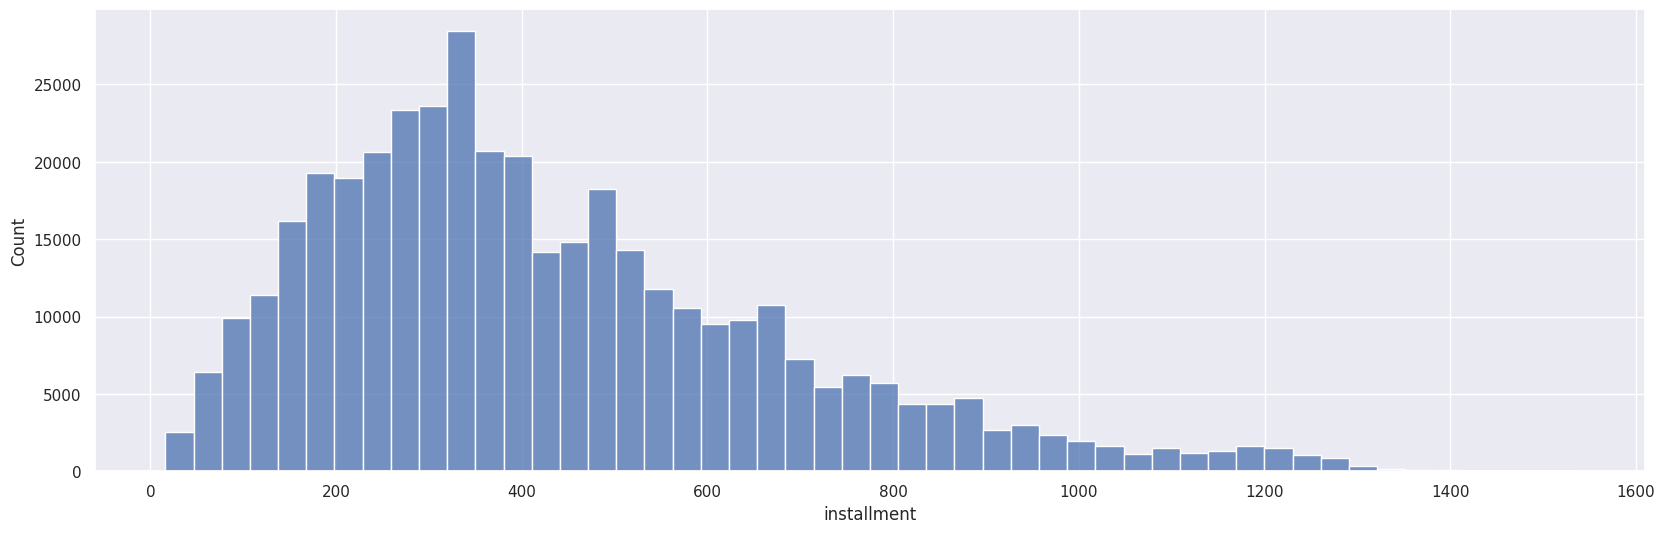

In [13]:
plt.figure(figsize=(20,6))
sns.histplot(df['installment'],kde=False, bins=50)

## Observations:
- loan amount and installment have Right skwied distrubution
- because it has long right tail
- (Positively skewed distrubution)

###  To check how loan amount affects the target variable we have used boxplot-

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

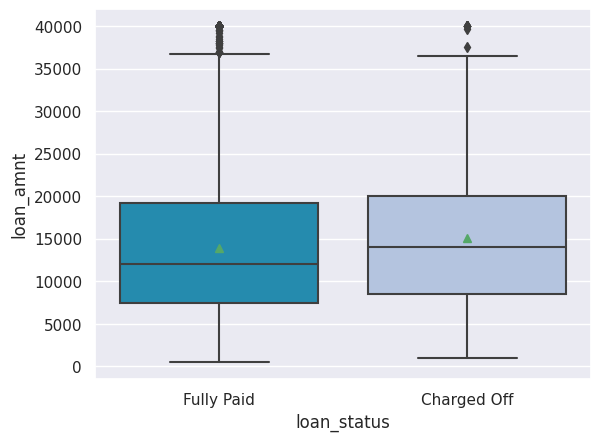

In [14]:
# it will also detect outliers
sns.boxplot(x='loan_status', y="loan_amnt", data=df, showmeans=True, palette='PuBuGn_r', saturation=5)

In [15]:
# checking mean value of loan approval:

df.groupby("loan_status")["loan_amnt"].describe()

count          mean          std     min     25%      50%  \
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                 75%      max  
loan_status                    
Charged Off  20000.0  40000.0  
Fully Paid   19225.0  40000.0

### Observations:
- Line inside the box that is Median line is almost equal for both fully paid and charged off loans.
- based on these we can make assumption that loan amount is not the factor in deciding whether the person will default or not.
- there are few outlier values

### To check how interset rate affects the target variable we have used boxplot-

<Axes: xlabel='loan_status', ylabel='int_rate'>

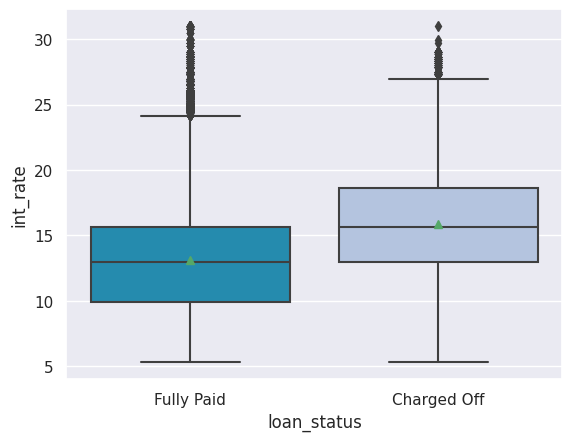

In [16]:
sns.boxplot(x='loan_status', y="int_rate", data=df, showmeans=True, palette='PuBuGn_r', saturation=5)

In [17]:
# summary statistics by loan status:

df.groupby("loan_status")["int_rate"].describe()

count       mean       std   min    25%    50%    75%    max
loan_status                                                                 
Charged Off   77673.0  15.882587  4.388135  5.32  12.99  15.61  18.64  30.99
Fully Paid   318357.0  13.092105  4.319105  5.32   9.91  12.99  15.61  30.99

### Observations:
- Charged-off loans tend to have much higher interest rates
- there are some outlier values

### Interest rate vs Loan amount:
- Interest Rate: Interest Rate on the loan
- Loan amount: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

<Axes: xlabel='int_rate', ylabel='loan_amnt'>

/home/lenovo/.local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/lenovo/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


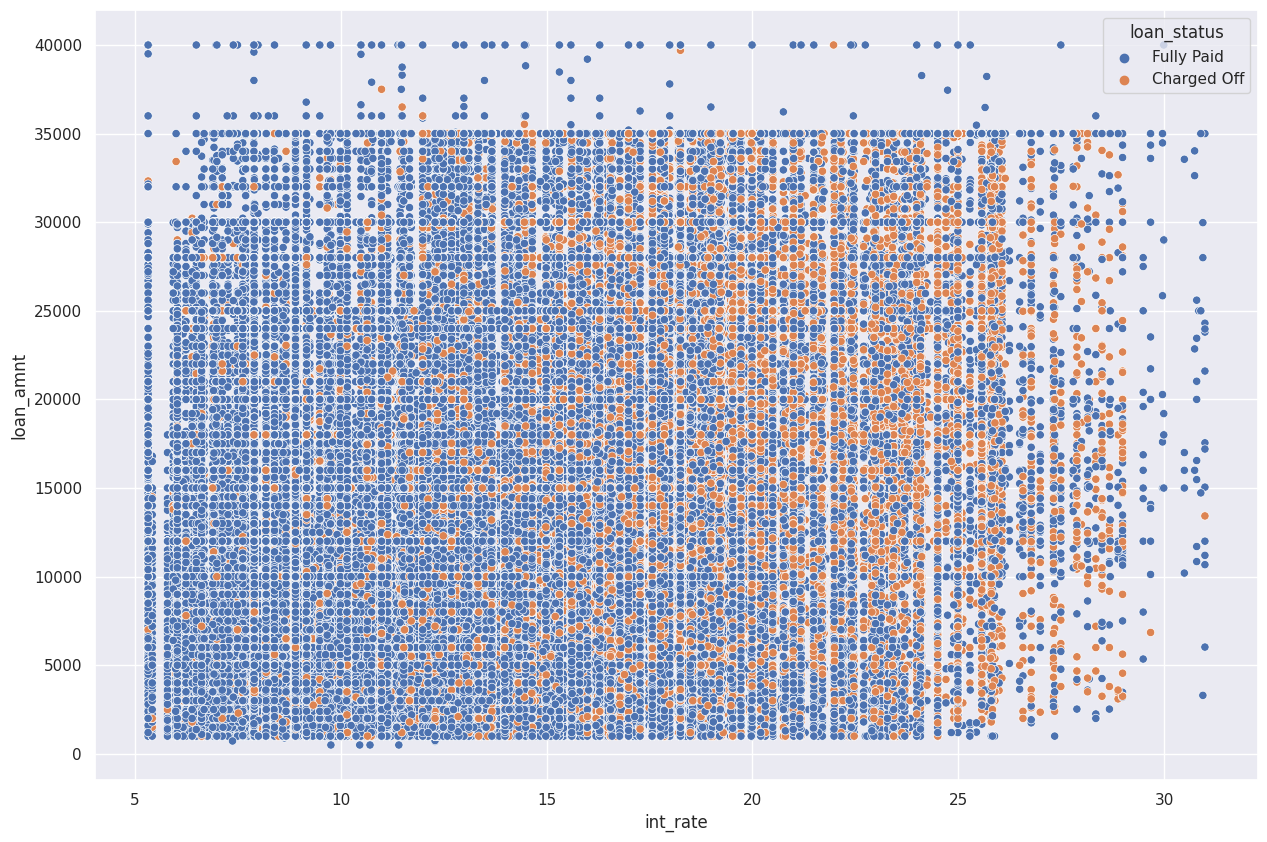

In [18]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='int_rate',y='loan_amnt', data=df, hue='loan_status')

### Observations:
- here we can see that as the interest rate is increasing the no of charged off loans are becoming denser(hight charged off loans as the interset rate increasing)
- but this is not the case in loan amount as we can see by graph.
- It seems that loans with high intersest rate are more likely to be unpaid

### Debt to Income ratio (dti):

- A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [19]:
df['dti'].describe()

count    396030.000000
mean         17.379514
std          18.019092
min           0.000000
25%          11.280000
50%          16.910000
75%          22.980000
max        9999.000000
Name: dti, dtype: float64

<Axes: xlabel='dti', ylabel='loan_status'>

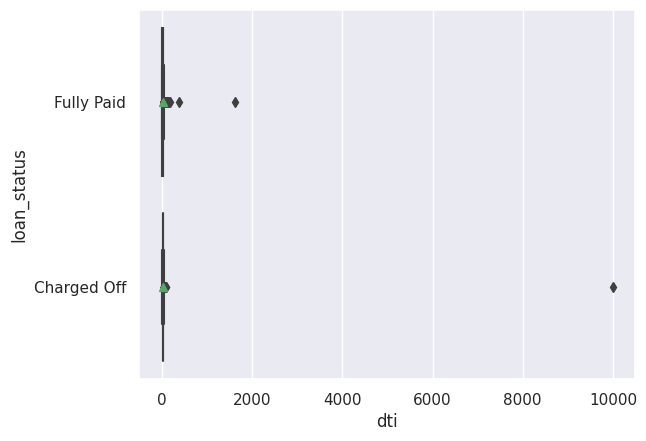

In [20]:
sns.boxplot(y='loan_status', x="dti", data=df, showmeans=True, palette='PuBuGn_r', saturation=5)

In [21]:
df.groupby('loan_status')['dti'].describe()

count       mean        std  min    25%    50%    75%     max
loan_status                                                                  
Charged Off   77673.0  19.656346  36.781068  0.0  13.33  19.34  25.55  9999.0
Fully Paid   318357.0  16.824010   8.500979  0.0  10.87  16.34  22.29  1622.0

<Axes: xlabel='dti', ylabel='Count'>

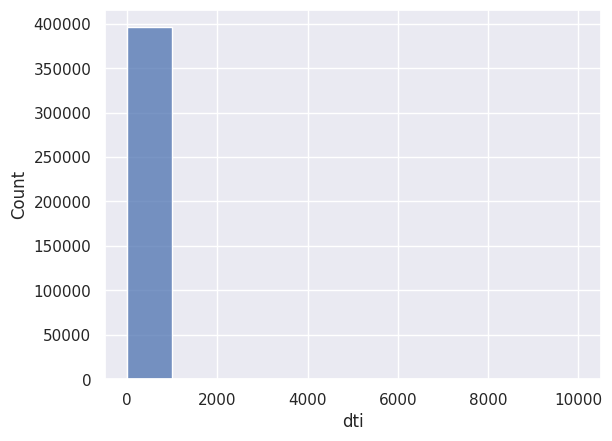

In [22]:
sns.histplot(df['dti'],kde=False, bins=10)

### Observation:
- The distribution is extremely skewed.
- Lowest dti ratio is 0
- highest dti ratio is 9999
- There are several outliers, this may be the wroung entry of data.

### Loan Grading -->> df['grade']
- Loan grading is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the collateral(something pledged as security for repayment of a loan), and the likelihood of repayment of the principal and interest.
- Loan grading is part of a lending institution's loan review or credit risk system and is usually an aspect of the credit underwriting and approval processes.
- The score takes into account not only the borrower's credit score but also a combination of several indicators of credit risk from the credit report and loan application, such as the level of guarantor support, repayment history, cash flow, projected yearly expenses, etc.

In [23]:
df['grade'].unique() # grade given to customer

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [24]:
new_grade=sorted(df['grade'])

<Axes: xlabel='grade', ylabel='count'>

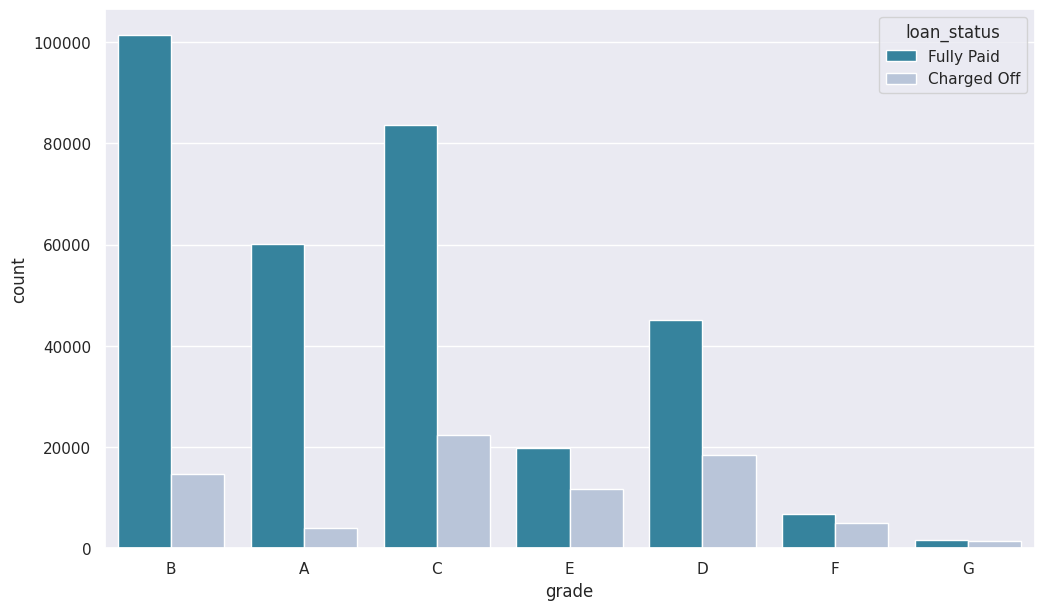

In [25]:
# we will plot grade variable with loan status to know how grading affects the loan-

plt.figure(figsize=(12,7)) # to change the shape of graph
sns.countplot(x='grade', hue='loan_status', data=df,  palette='PuBuGn_r')

In [26]:
# df[df['grade']=='A'].groupby("loan_status")["grade"].count()*100/len(df[df['grade']=='A'])
# 1st have taken out the rows which have grade as "A"
# we have used groupby based on loan status
# we got one object on which we will call grade variable and count it.
# Changed it into % values.
for grade in sorted(df['grade'].unique()):
    print(f"for grade={grade}")
    print(df[df['grade']==grade].groupby("loan_status")["grade"].count()*100/len(df[df['grade']==grade]))
    print()

for grade=A
loan_status
Charged Off     6.287878
Fully Paid     93.712122
Name: grade, dtype: float64

for grade=B
loan_status
Charged Off    12.573049
Fully Paid     87.426951
Name: grade, dtype: float64

for grade=C
loan_status
Charged Off    21.1809
Fully Paid     78.8191
Name: grade, dtype: float64

for grade=D
loan_status
Charged Off    28.867829
Fully Paid     71.132171
Name: grade, dtype: float64

for grade=E
loan_status
Charged Off    37.36344
Fully Paid     62.63656
Name: grade, dtype: float64

for grade=F
loan_status
Charged Off    42.787971
Fully Paid     57.212029
Name: grade, dtype: float64

for grade=G
loan_status
Charged Off    47.8389
Fully Paid     52.1611
Name: grade, dtype: float64



### Observations:
- From these we can see as the grade increasing percentage of charged off loans increasing.
- Default rate is incresing as we go from category A onwards.

### Subscore -->> df["sub_grade"]
- subscores decide the interest rate a borrower is expected to pay, the max amount they can borrow, and the term of the loan.

In [27]:
df["sub_grade"].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [28]:
sub_grade_ordered = sorted(df["sub_grade"])
# odered subgrade variable for better visualization

<Axes: ylabel='count'>

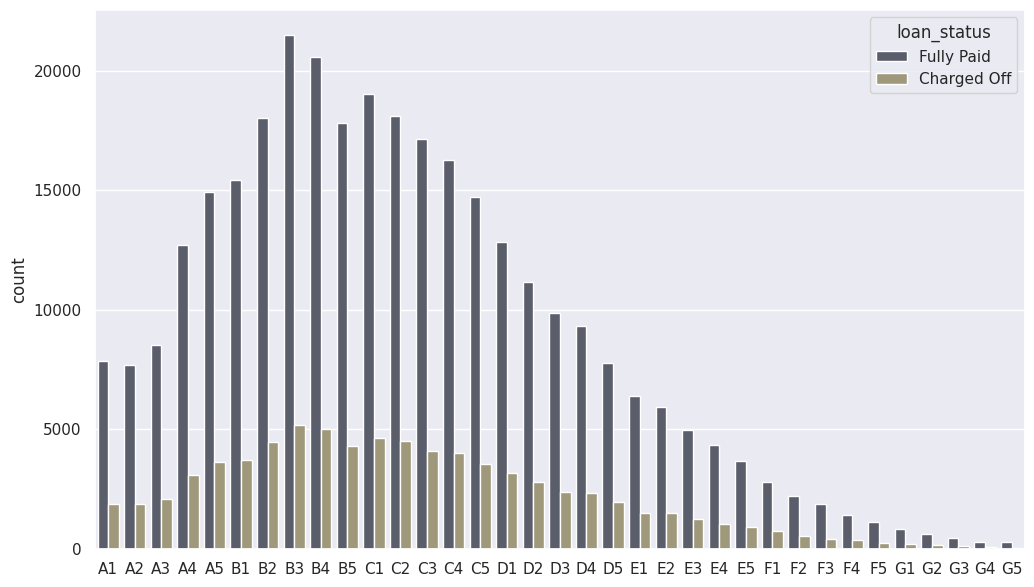

In [29]:
plt.figure(figsize=(12,7)) 
sns.countplot(x=sub_grade_ordered, hue='loan_status', data=df, palette='cividis')

In [30]:
for grade in sorted(df["sub_grade"].unique()):
    print(f"For sub grade {grade}:")
    print(df[df['sub_grade']==grade].groupby("loan_status")["sub_grade"].count()*100/len(df[df['sub_grade']==grade]))
    print()

For sub grade A1:
loan_status
Charged Off     2.867715
Fully Paid     97.132285
Name: sub_grade, dtype: float64

For sub grade A2:
loan_status
Charged Off     4.818647
Fully Paid     95.181353
Name: sub_grade, dtype: float64

For sub grade A3:
loan_status
Charged Off     5.805598
Fully Paid     94.194402
Name: sub_grade, dtype: float64

For sub grade A4:
loan_status
Charged Off     7.023877
Fully Paid     92.976123
Name: sub_grade, dtype: float64

For sub grade A5:
loan_status
Charged Off     8.49077
Fully Paid     91.50923
Name: sub_grade, dtype: float64

For sub grade B1:
loan_status
Charged Off     9.8582
Fully Paid     90.1418
Name: sub_grade, dtype: float64

For sub grade B2:
loan_status
Charged Off    10.8513
Fully Paid     89.1487
Name: sub_grade, dtype: float64

For sub grade B3:
loan_status
Charged Off    12.335397
Fully Paid     87.664603
Name: sub_grade, dtype: float64

For sub grade B4:
loan_status
Charged Off    13.839303
Fully Paid     86.160697
Name: sub_grade, dtype: fl

### Observations:
- E, F and G subgrades has maximum loan defalters.

### we will check how verification status is affecting the loan status-

<Axes: xlabel='verification_status', ylabel='count'>

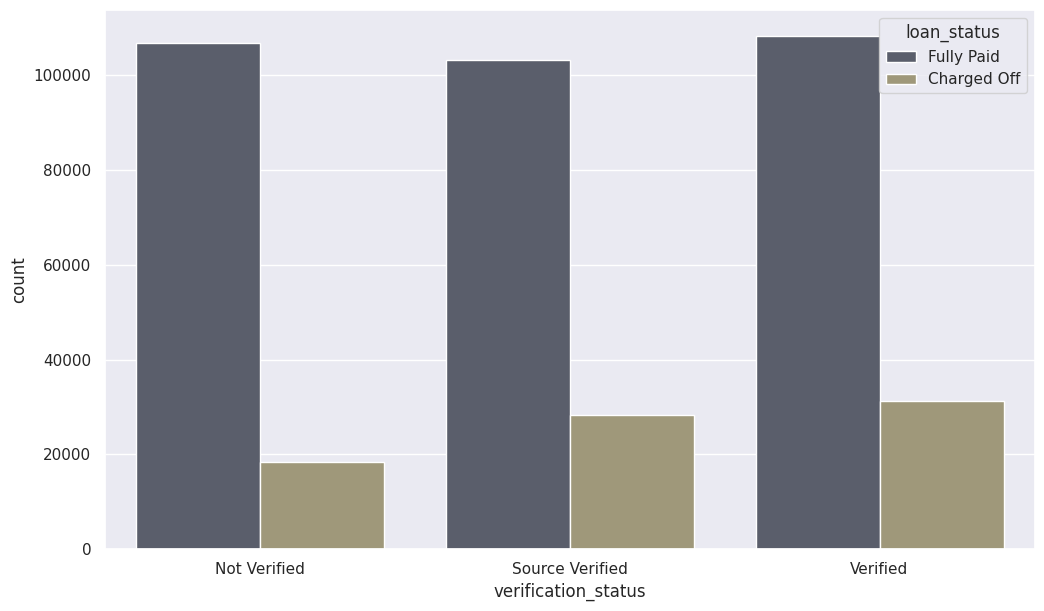

In [31]:
plt.figure(figsize=(12,7))
sns.countplot(x='verification_status', hue='loan_status', data=df, palette='cividis')

In [32]:
for status in df['verification_status'].unique():
    print(f"For {status}:")
    print(df[df["verification_status"]==status].groupby("loan_status")["verification_status"].count()*100/len(df[df["verification_status"]==status]))
    print()

For Not Verified:
loan_status
Charged Off    14.635999
Fully Paid     85.364001
Name: verification_status, dtype: float64

For Source Verified:
loan_status
Charged Off    21.474293
Fully Paid     78.525707
Name: verification_status, dtype: float64

For Verified:
loan_status
Charged Off    22.321102
Fully Paid     77.678898
Name: verification_status, dtype: float64



### Observations:
- Here we can see a trend that more verified people defaulted than the not verified
- distrubution for 'not verified', 'verified' and 'scource verified' is almost similar.
- that means current company varification process is not efficient as it should be.

### application_type

In [33]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [34]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [35]:
for status in df['application_type'].unique():
    print(f"status={status}")
    print(df[df['application_type']==status].groupby("loan_status")['application_type'].count()*100/len(df[df['application_type']==status]))
    

status=INDIVIDUAL
loan_status
Charged Off    19.608721
Fully Paid     80.391279
Name: application_type, dtype: float64
status=JOINT
loan_status
Charged Off    12.705882
Fully Paid     87.294118
Name: application_type, dtype: float64
status=DIRECT_PAY
loan_status
Charged Off    35.664336
Fully Paid     64.335664
Name: application_type, dtype: float64


<Axes: xlabel='application_type', ylabel='count'>

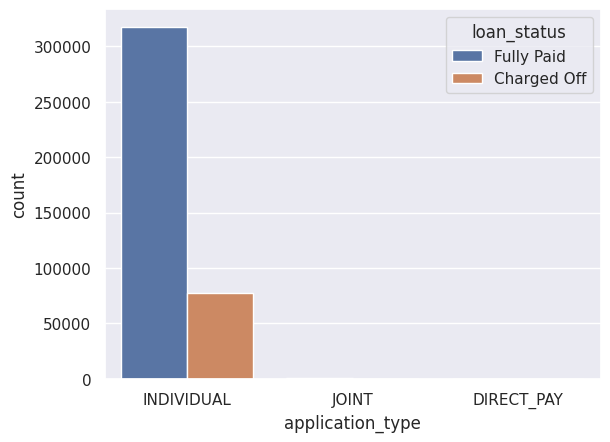

In [36]:
sns.countplot(x='application_type',hue='loan_status',data=df)

### Observations
- the maximum category in which the loan is dispersed is the individual category.
- the rest of the category has negeligible candidates

### initial_list_status:

In [37]:
for status in df['initial_list_status'].unique():
    print(f"For status {status}:")
    print(df[df["initial_list_status"]==status].groupby("loan_status")["initial_list_status"].count()*100/len(df[df["initial_list_status"]==status]))
    print()

For status w:
loan_status
Charged Off    20.07546
Fully Paid     79.92454
Name: initial_list_status, dtype: float64

For status f:
loan_status
Charged Off    19.305991
Fully Paid     80.694009
Name: initial_list_status, dtype: float64



### title and purpose:

In [38]:
df['title'].nunique()

48817

In [39]:
df['title'].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [40]:
# plt.figure(figsize=(12,7)) 
# sns.countplot(x='title',data=df,hue='loan_status',  palette='PuBuGn_r')
# plt.xticks(rotation="vertical")

In [41]:
df['purpose'].nunique()

14

In [42]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'vacation'),
  Text(1, 0, 'debt_consolidation'),
  Text(2, 0, 'credit_card'),
  Text(3, 0, 'home_improvement'),
  Text(4, 0, 'small_business'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'other'),
  Text(7, 0, 'medical'),
  Text(8, 0, 'wedding'),
  Text(9, 0, 'car'),
  Text(10, 0, 'moving'),
  Text(11, 0, 'house'),
  Text(12, 0, 'educational'),
  Text(13, 0, 'renewable_energy')])

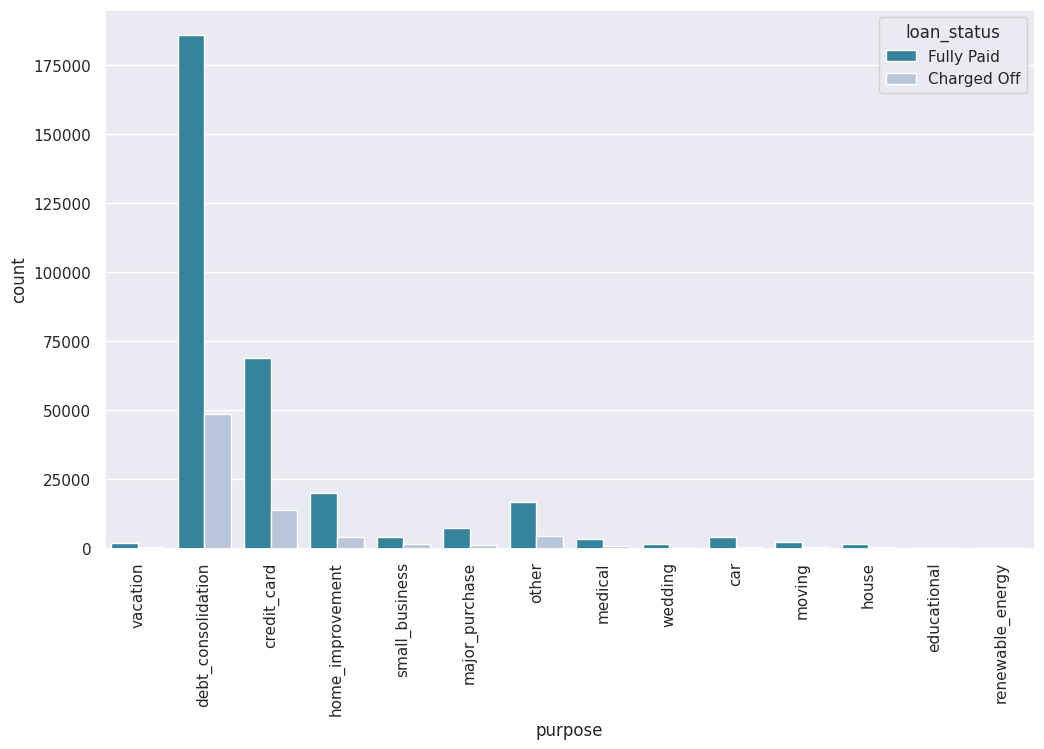

In [43]:
plt.figure(figsize=(12,7)) 
sns.countplot(x='purpose',data=df,hue='loan_status',  palette='PuBuGn_r')
plt.xticks(rotation="vertical")

### Observations
- the maximum loan is given and charged for the debt_consolidataion and debit card repayment
-

In [44]:
#here the title and purpose are giveing the same type of informations
# since the title has too many category there fore it it almost impossible to handle so we are deleateing the title
df.drop("title", axis=1, inplace=True)

### emp_length:

In [45]:
df["emp_length"].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [46]:
#creating an ordered list of employes
emp_order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

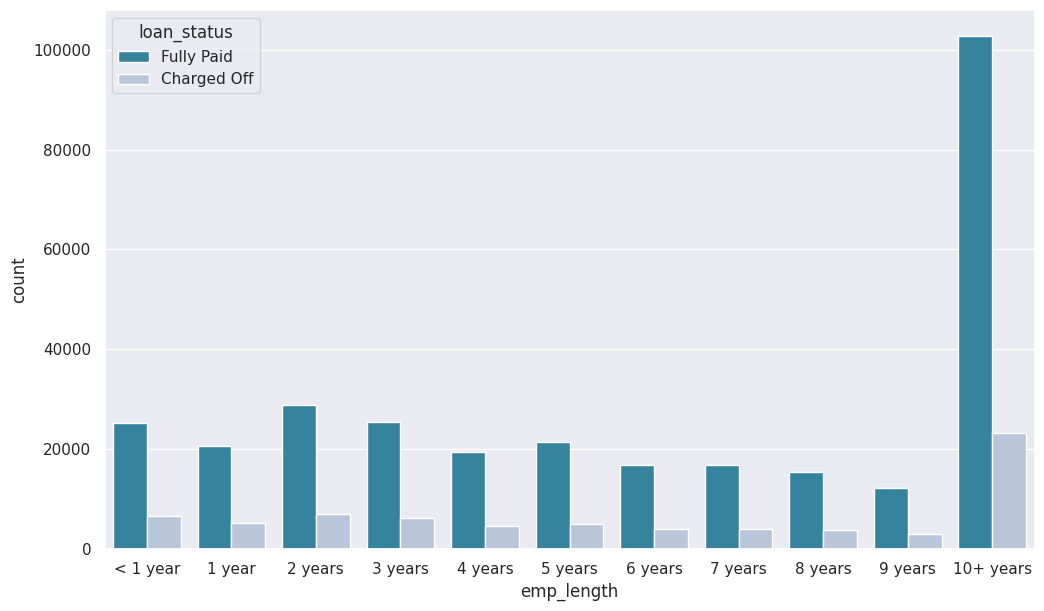

In [47]:
plt.figure(figsize=(12,7))
sns.countplot(x=df['emp_length'], order=emp_order, hue='loan_status', data=df, palette='PuBuGn_r')

In [48]:
for value in emp_order:
    print(f"For grade {value}:")
    print(df[df['emp_length']==value].groupby("loan_status")["emp_length"].count()*100/len(df[df['emp_length']==value]))
    print()

For grade < 1 year:
loan_status
Charged Off    20.687155
Fully Paid     79.312845
Name: emp_length, dtype: float64

For grade 1 year:
loan_status
Charged Off    19.913453
Fully Paid     80.086547
Name: emp_length, dtype: float64

For grade 2 years:
loan_status
Charged Off    19.326206
Fully Paid     80.673794
Name: emp_length, dtype: float64

For grade 3 years:
loan_status
Charged Off    19.523133
Fully Paid     80.476867
Name: emp_length, dtype: float64

For grade 4 years:
loan_status
Charged Off    19.238477
Fully Paid     80.761523
Name: emp_length, dtype: float64

For grade 5 years:
loan_status
Charged Off    19.218721
Fully Paid     80.781279
Name: emp_length, dtype: float64

For grade 6 years:
loan_status
Charged Off    18.919438
Fully Paid     81.080562
Name: emp_length, dtype: float64

For grade 7 years:
loan_status
Charged Off    19.4774
Fully Paid     80.5226
Name: emp_length, dtype: float64

For grade 8 years:
loan_status
Charged Off    19.976002
Fully Paid     80.023998
Nam

### Observations:
- The majority of people who took loan has 10 + years of experience
- But thr Distribution is somewhat uniform across all the employee length.
- Here this is not a very deciding factor whether someone will charged off or no

In [49]:
df.drop("emp_length", axis=1, inplace=True)

### mort_acc:

In [50]:
df["mort_acc"].count()

358235

In [51]:
df["mort_acc"].isna().sum()

37795

In [52]:
#mortage accounts count
df["mort_acc"].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [53]:
# as the variable is of numeric type we will fill missing values of mean of variable

df["mort_acc"] = df["mort_acc"].fillna(np.mean(df["mort_acc"]))

In [54]:
df["mort_acc"].isna().sum()

0

### pub_rec:

In [55]:
df['pub_rec'].value_counts()

0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: pub_rec, dtype: int64

In [56]:
df['pub_rec_bankruptcies'].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

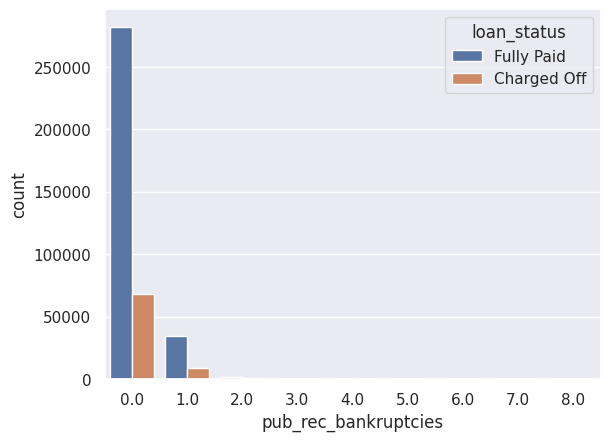

In [57]:
sns.countplot(x='pub_rec_bankruptcies',data=df,hue='loan_status')

In [58]:
# we have considered 0 as a as good customer
# rest all as a bad customer.
df['pub_rec']=df['pub_rec'].apply(lambda x: 0 if x==0 else 1)

In [59]:
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].apply(lambda a : 0 if a ==0 else 1)
df['pub_rec_bankruptcies']

0         0
1         0
2         0
3         0
4         0
         ..
396025    0
396026    0
396027    0
396028    0
396029    0
Name: pub_rec_bankruptcies, Length: 396030, dtype: int64

In [60]:
df['pub_rec_bankruptcies'].value_counts()

0    350380
1     45650
Name: pub_rec_bankruptcies, dtype: int64

### home_ownership:

In [61]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [62]:
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

<Axes: ylabel='home_ownership'>

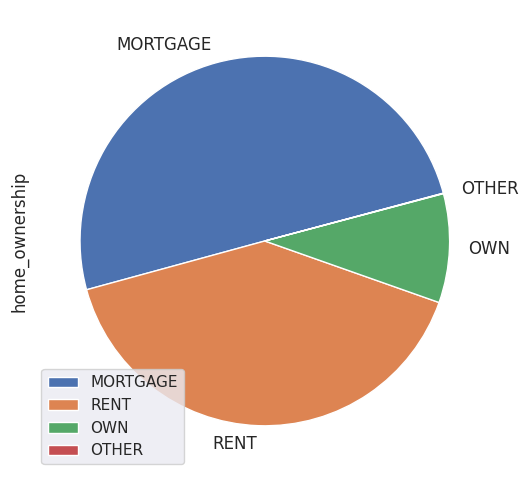

In [63]:
df['home_ownership'].value_counts().plot(kind='pie',legend=True,startangle=15,fontsize=12,figsize=(14,6))

In [64]:
# remaining columns with null values have less than 1% of missing values
# we will delete that records from the data.
# It will not effect the result of data by keeping or deleteing

df.dropna(inplace=True)

In [65]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [66]:
#creating the list for the accepted values

terml=list(df['term'])
int_ratel=list(df['int_rate'])
installmentl=list(df['installment'])
home_ownershipl=list(df['home_ownership'])
dtil=list(df['dti'])
revol_ball=list(df['revol_bal'])
revol_utill=list(df['revol_util']) 
total_accl=list(df['total_acc']) 
mort_accl=list(df['mort_acc'])






## Handling Categorical Variables:

In [67]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

### loan_status:

In [68]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [69]:
df['loan_status']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [70]:
df['loan_status'].value_counts()

1    301171
0     71671
Name: loan_status, dtype: int64

<Axes: ylabel='loan_status'>

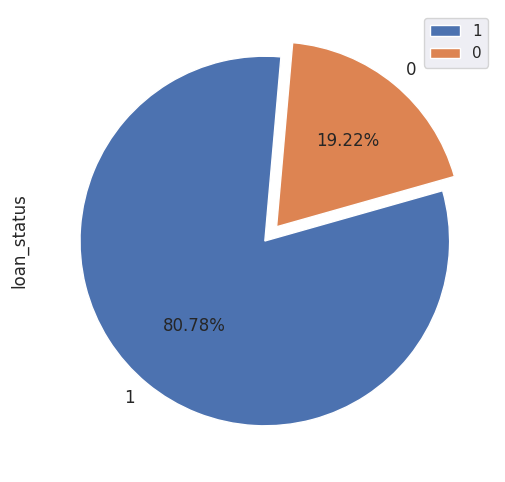

In [71]:
df['loan_status'].value_counts().plot(kind='pie',legend=True, startangle=85, fontsize=12, figsize=(14,6),autopct='%1.2f%%',explode= (0, 0.1))

### initial_list_status:

In [72]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [73]:
df['initial_list_status']=df['initial_list_status'].map({'w':0,'f':1})

In [74]:
df['initial_list_status'].unique()

array([0, 1])

<Axes: xlabel='initial_list_status', ylabel='count'>

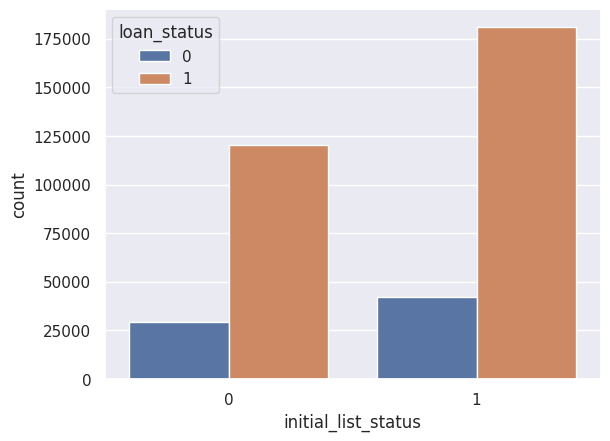

In [75]:
sns.countplot(x='initial_list_status',data=df,hue='loan_status')

### term:

In [76]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [77]:
for value in df['term'].unique():
    print(f"For {value}:")
    print(df[df['term']==value].groupby('loan_status')['term'].count()*100/len(df[df['term']==value]))

For  36 months:
loan_status
0    15.233438
1    84.766562
Name: term, dtype: float64
For  60 months:
loan_status
0    31.642525
1    68.357475
Name: term, dtype: float64


In [78]:
df['term'] = df['term'].map({' 36 months': 0, ' 60 months': 1})
df['term'].unique()

array([0, 1])

### address:

In [79]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 372842, dtype: object

In [80]:
df['address'].nunique()

370769

In [81]:
# as we have seen address column has 392898 unique values in it so it will create
# it will create a problem of curse of dimensionality.
# so we have extracted only the zipcode from the address and used it-

df['postal_code']=df['address'].apply(lambda x : x[-5:])
df['postal_code'].nunique()

10

In [82]:
df['postal_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

In [83]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 372842, dtype: object

In [84]:
df.drop(['address'],inplace= True, axis=1)

### earliest_cr_line:

In [85]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 372842, dtype: object

In [86]:
df.to_csv('new_visualization.csv')

In [87]:
#earliesr cr line extracting the year only
df["earliest_cr_line"]=df["earliest_cr_line"].apply(lambda x:int(x[-4:]))

In [88]:
df['earliest_cr_line'].unique()

array([1990, 2004, 2007, 2006, 1999, 2005, 1994, 1997, 1984, 1995, 2001,
       1982, 1996, 2000, 2003, 2008, 1998, 2002, 1988, 1992, 2010, 1986,
       2012, 1978, 1993, 1983, 1989, 1991, 2011, 1981, 1987, 1985, 2009,
       1967, 1972, 1979, 1965, 1980, 1977, 1974, 1976, 1975, 1971, 2013,
       1970, 1973, 1969, 1963, 1960, 1966, 1961, 1964, 1968, 1958, 1955,
       1959, 1962, 1944, 1957, 1950, 1953, 1954, 1951, 1956, 1948])

### issue_date:
- The month which the loan was funded.
- we're only using variables available to investors before the loan was funded. 
- issue_d will not be included in the final model

In [89]:
#dropping issue date as the loan defaulter will not be dependent on issue date.
df.drop("issue_d",axis=1,inplace=True)

### grade:

In [90]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [91]:
sorted_grades = sorted(df['grade'].unique())
sorted_grades

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [92]:
ordinals = [x for x in range(1,df['grade'].nunique()+1)]
ordinals

[1, 2, 3, 4, 5, 6, 7]

In [93]:
grade_map = dict(zip(sorted_grades,ordinals))
grade_map

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

In [94]:
df['grade'] = df['grade'].map(grade_map)
df['grade'].unique()

array([2, 1, 3, 5, 4, 6, 7])

In [95]:
# As grade and subgrade is expressing similar kind of information so dropping subgrade colomn-
df.drop('sub_grade', inplace=True, axis=1)

### Outliers Removals

In [96]:
max_threshold = df['loan_amnt'].quantile(0.99)
min_threshold = df['loan_amnt'].quantile(0.01)
df = df[(df['loan_amnt']<max_threshold) & (df['loan_amnt']>min_threshold)]
df.shape

(354844, 23)

In [97]:
max_threshold = df['int_rate'].quantile(0.99)
min_threshold = df['int_rate'].quantile(0.01)
df = df[(df['int_rate']<max_threshold) & (df['int_rate']>min_threshold)]
df.shape

(346727, 23)

In [98]:
max_threshold = df['dti'].quantile(0.99)
min_threshold = df['dti'].quantile(0.01)
df = df[(df['dti']<max_threshold) & (df['dti']>min_threshold)]
df.shape

(339762, 23)

In [99]:
max_threshold = df['installment'].quantile(0.99)
min_threshold = df['installment'].quantile(0.01)
df = df[(df['installment']<max_threshold) & (df['installment']>min_threshold)]
df.shape

(332963, 23)

### Labal encoding:

In [100]:
df.select_dtypes(['object']).columns

Index(['emp_title', 'home_ownership', 'verification_status', 'purpose',
       'application_type', 'postal_code'],
      dtype='object')

In [101]:
df['postal_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '93700', '86630'], dtype=object)

In [102]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [103]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(data,var):
    encoder=LabelEncoder()
    data[var]=encoder.fit_transform(data[var])


In [104]:
cols=df.select_dtypes(['object']).columns
cols

Index(['emp_title', 'home_ownership', 'verification_status', 'purpose',
       'application_type', 'postal_code'],
      dtype='object')

In [105]:
for val in cols:
    label_encoder(df,val)

In [106]:
df['postal_code'].unique()

array([3, 1, 0, 2, 5, 7, 4, 6, 9, 8])

In [107]:
df['home_ownership'].unique()

array([3, 0, 2, 1])

In [108]:
terml_encoded=list(df['term'])
int_ratel_encoded=list(df['int_rate'])
installmentl_encoded=list(df['installment'])
home_ownershipl_encoded=list(df['home_ownership'])
dtil_encoded=list(df['dti'])
revol_ball_encoded=list(df['revol_bal'])
revol_utill_encoded=list(df['revol_util']) 
total_accl_encoded=list(df['total_acc']) 
mort_accl_encoded=list(df['mort_acc'])

## correlations:

<Axes: >

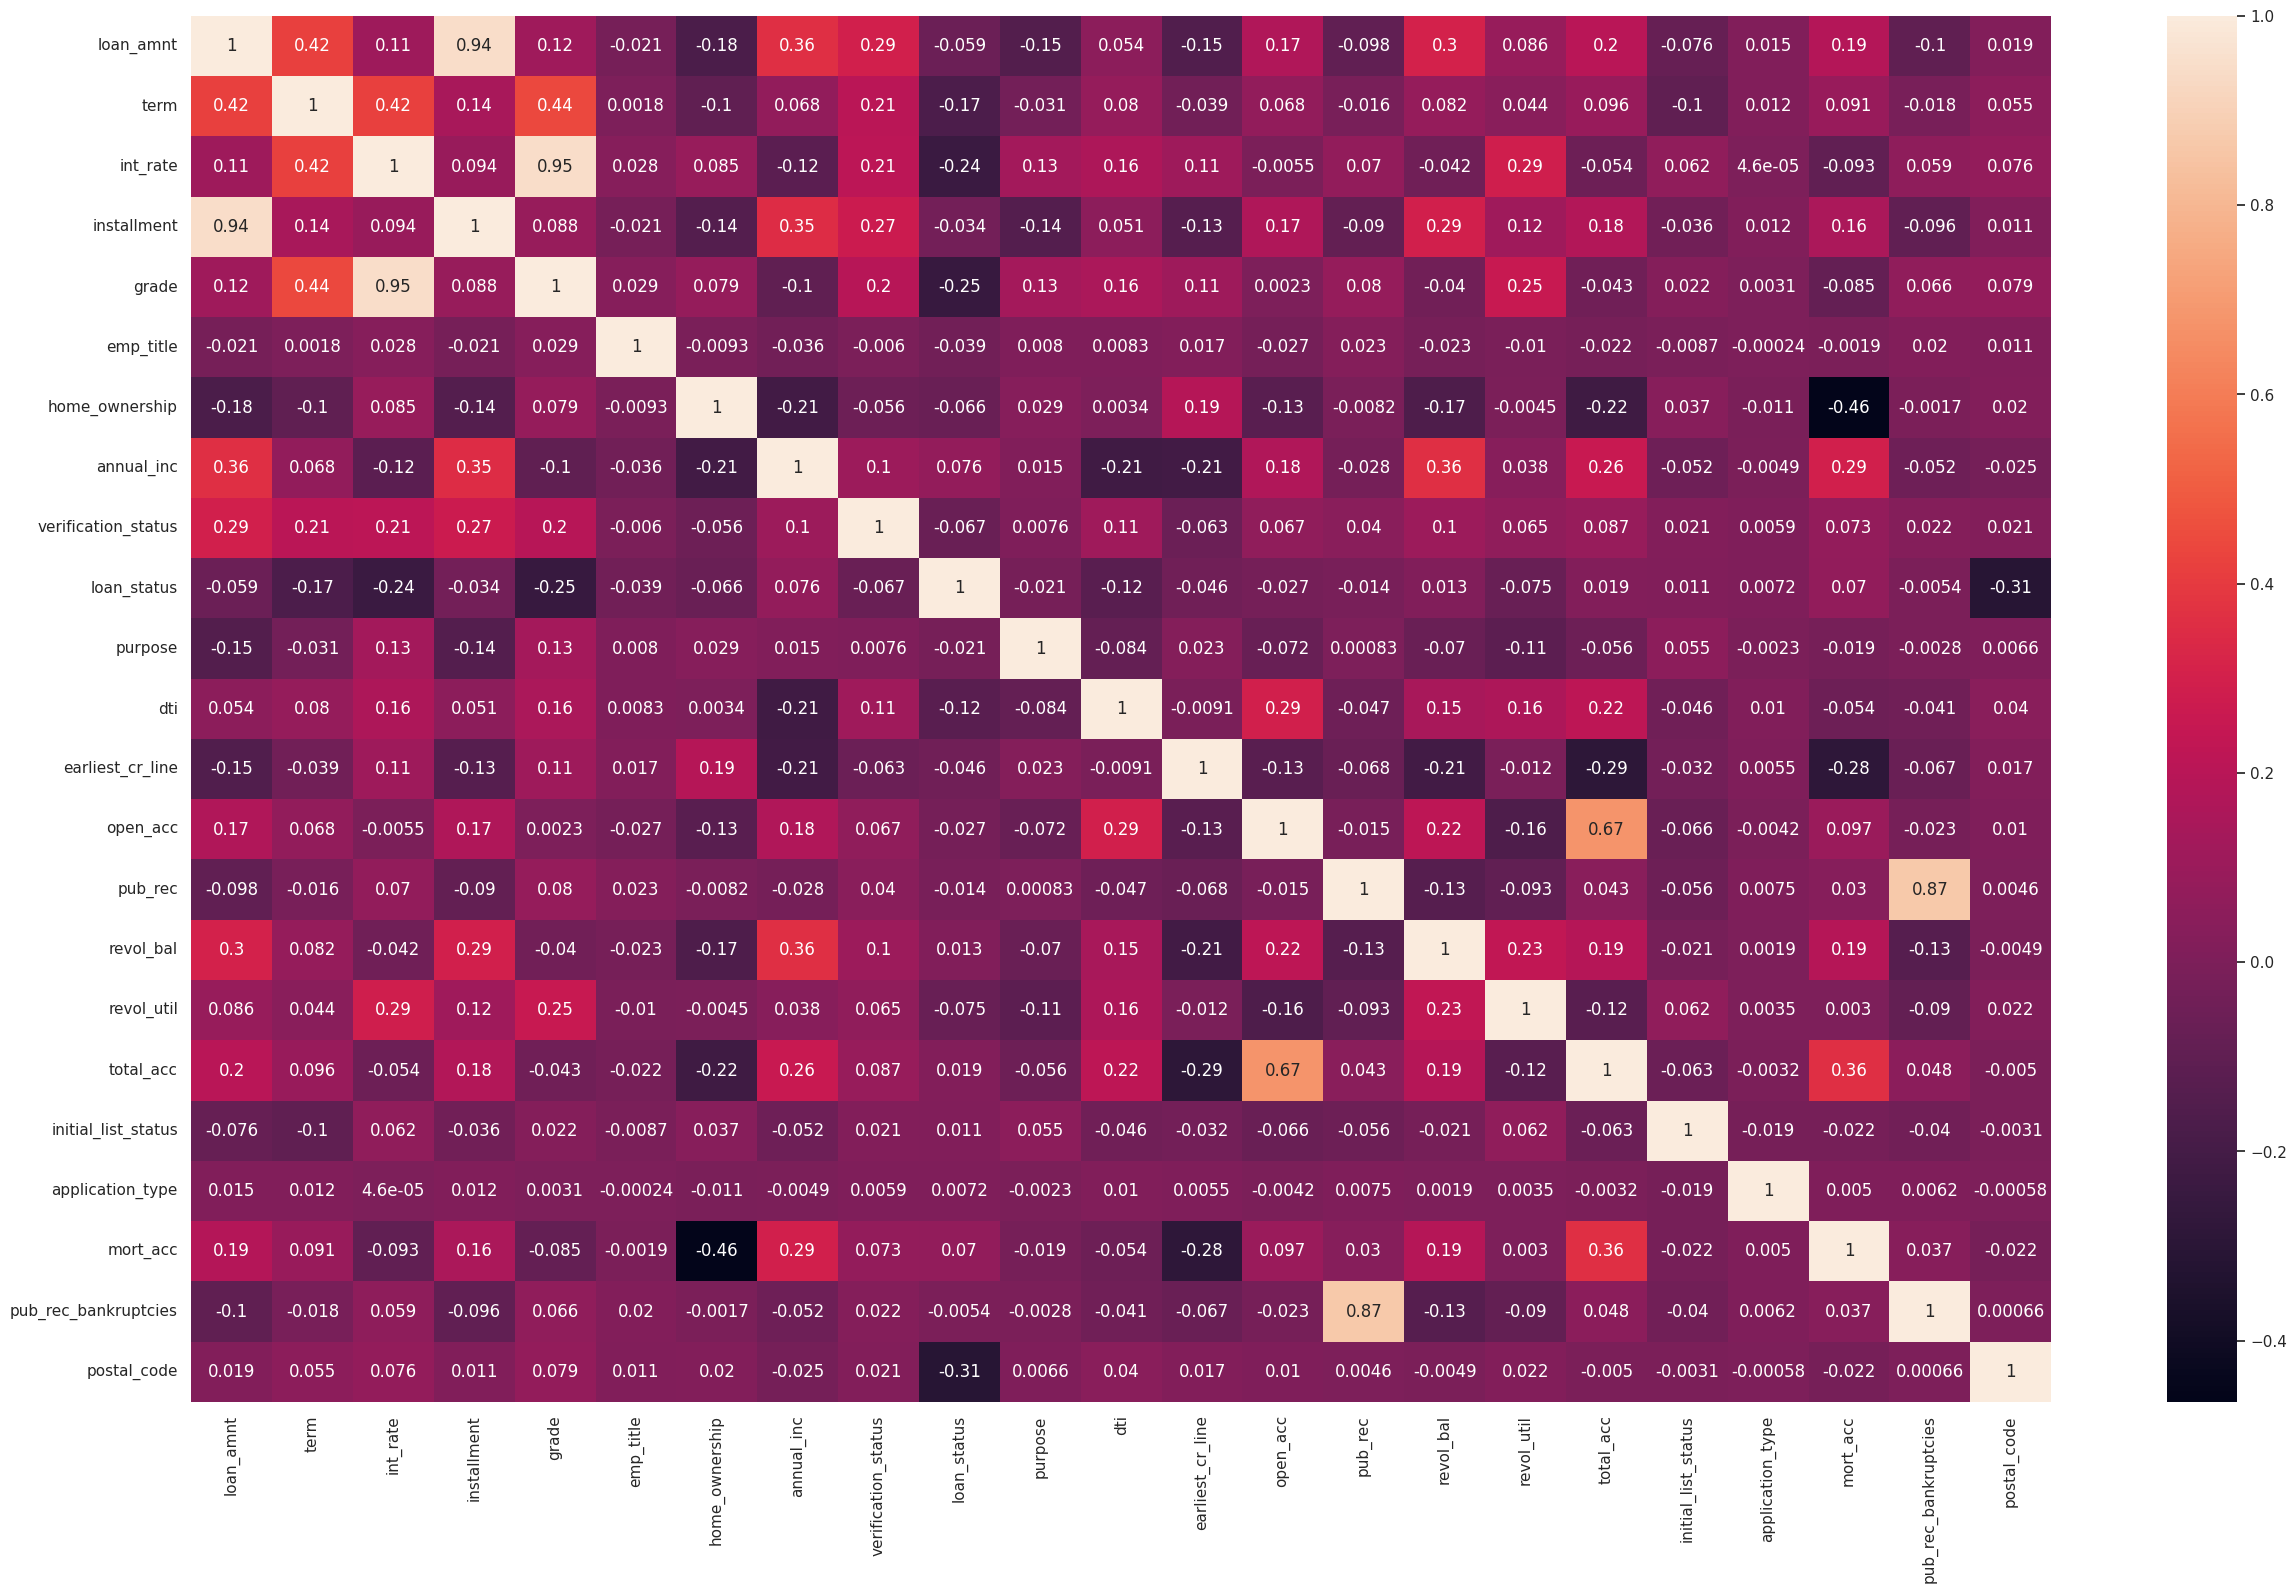

In [109]:
plt.figure(figsize=(30,18))

sns.heatmap(data=df.corr(), annot=True)

In [110]:
# These columns dropped due to above correlations-

df.drop(['loan_amnt','grade','initial_list_status','pub_rec_bankruptcies','application_type','open_acc'],axis =1,inplace =True)

In [111]:
df.shape

(332963, 17)

<Axes: >

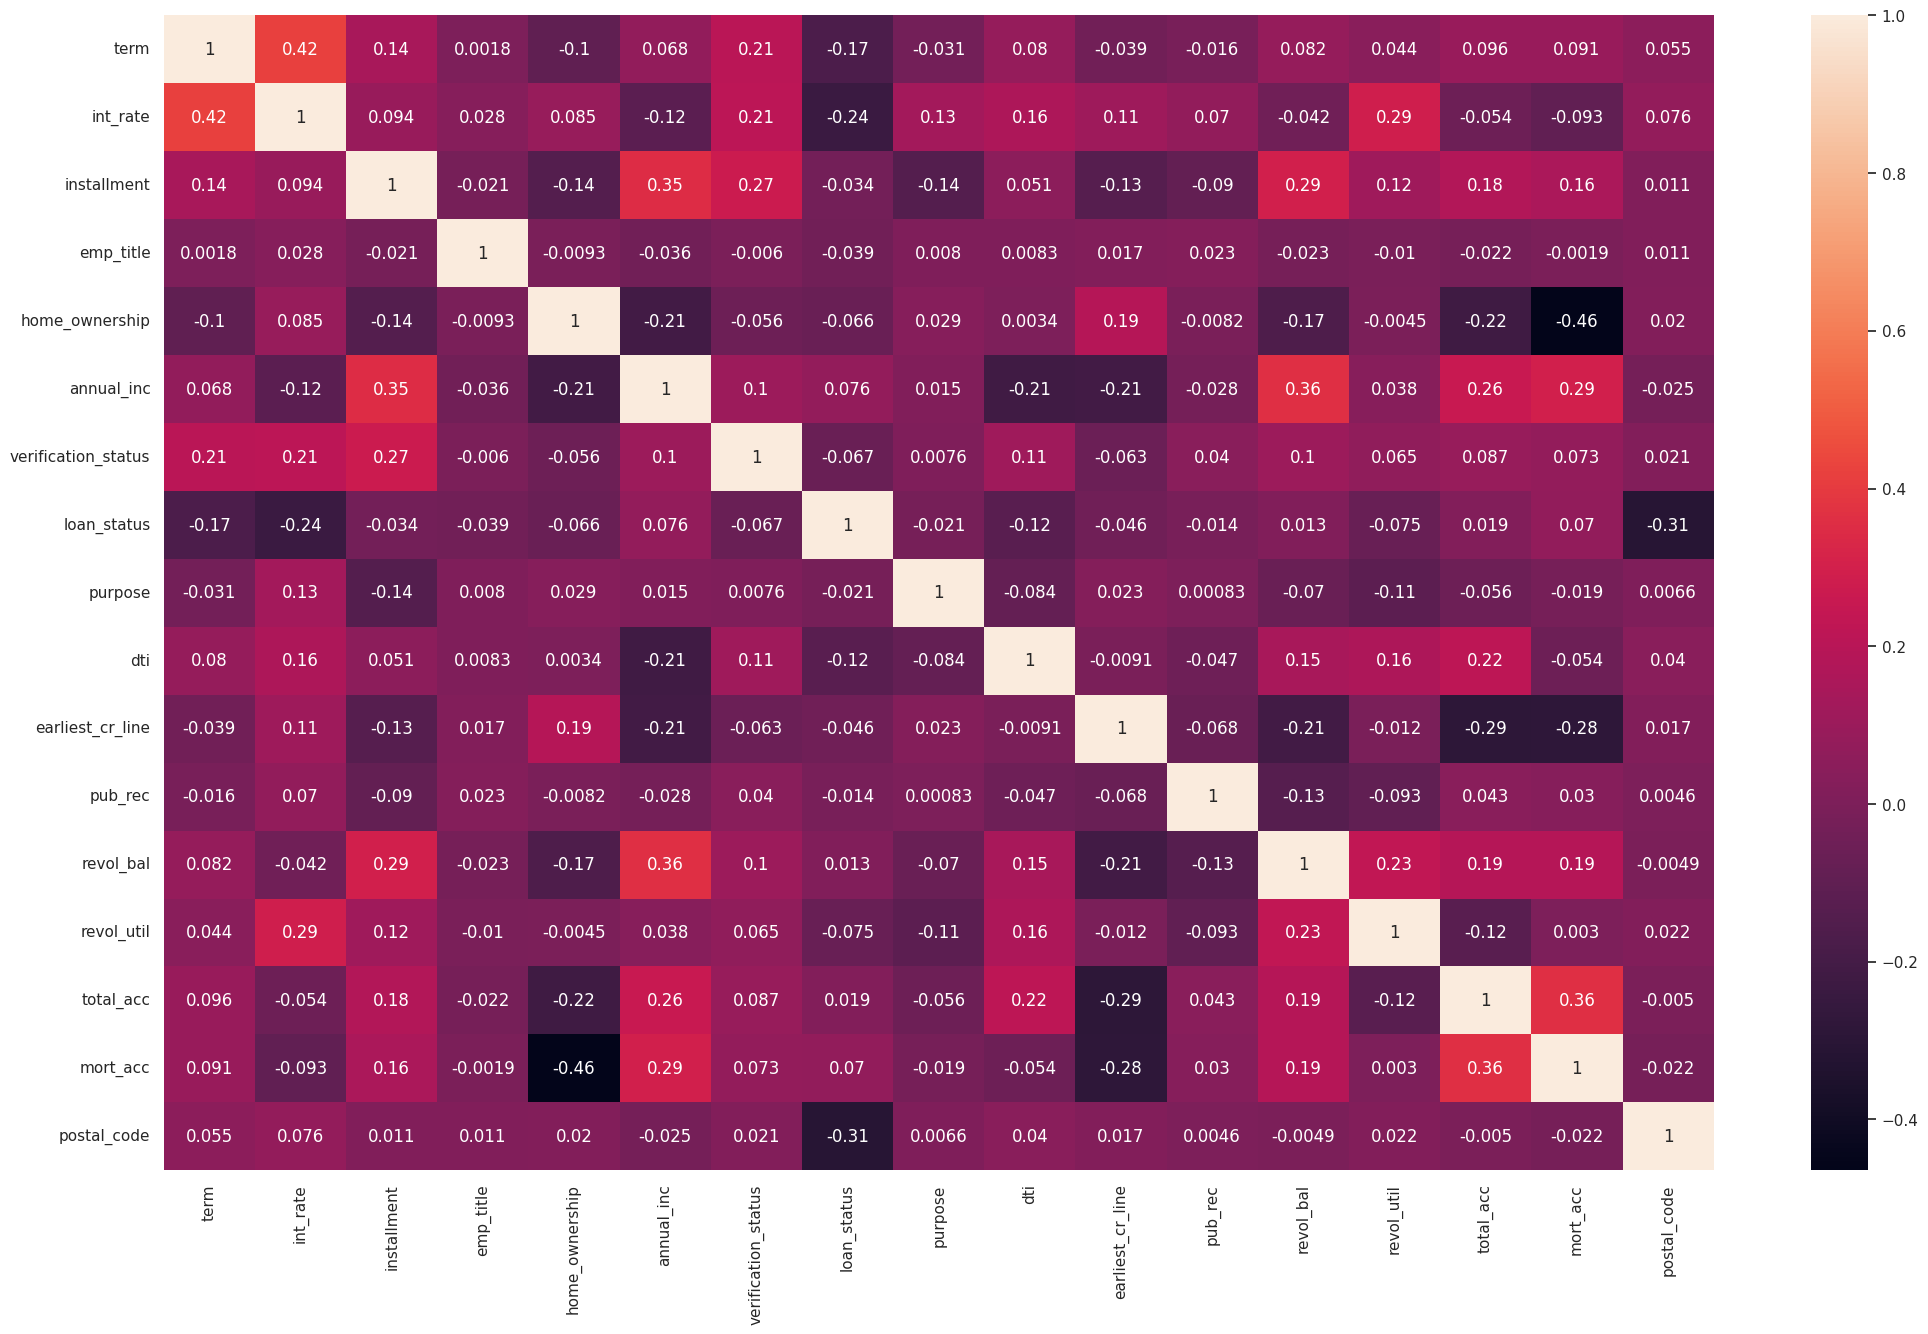

In [112]:
plt.figure(figsize=(25,15))
sns.heatmap(data=df.corr(), annot=True)


## Creating dependent and independent variables:

In [113]:
x=df.drop("loan_status",axis=1)
y=df["loan_status"]

In [114]:
x.shape ,y.shape

((332963, 16), (332963,))

## SMOTE:

In [115]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.3)

x_res, y_res = smote.fit_resample(x,y)
x_res.shape, y_res.shape

((351235, 16), (351235,))

## Feature selection method:

In [116]:
from sklearn.feature_selection import mutual_info_classif


In [117]:
# determining the mutual information
mutual_info= mutual_info_classif(x_res,y_res)
mutual_info

array([0.01595656, 0.10807526, 0.04387686, 0.00977779, 0.03931102,
       0.01756159, 0.02219529, 0.0179798 , 0.05983879, 0.00358362,
       0.00421902, 0.02375527, 0.07334445, 0.07959099, 0.06719522,
       0.21169003])

In [118]:
mutual_info = pd.Series(mutual_info)
mutual_info

0     0.015957
1     0.108075
2     0.043877
3     0.009778
4     0.039311
5     0.017562
6     0.022195
7     0.017980
8     0.059839
9     0.003584
10    0.004219
11    0.023755
12    0.073344
13    0.079591
14    0.067195
15    0.211690
dtype: float64

In [119]:
mutual_info.index = x_res.columns

In [120]:
mutual_info.sort_values(ascending=False)

postal_code            0.211690
int_rate               0.108075
total_acc              0.079591
revol_util             0.073344
mort_acc               0.067195
dti                    0.059839
installment            0.043877
home_ownership         0.039311
revol_bal              0.023755
verification_status    0.022195
purpose                0.017980
annual_inc             0.017562
term                   0.015957
emp_title              0.009778
pub_rec                0.004219
earliest_cr_line       0.003584
dtype: float64

<Axes: >

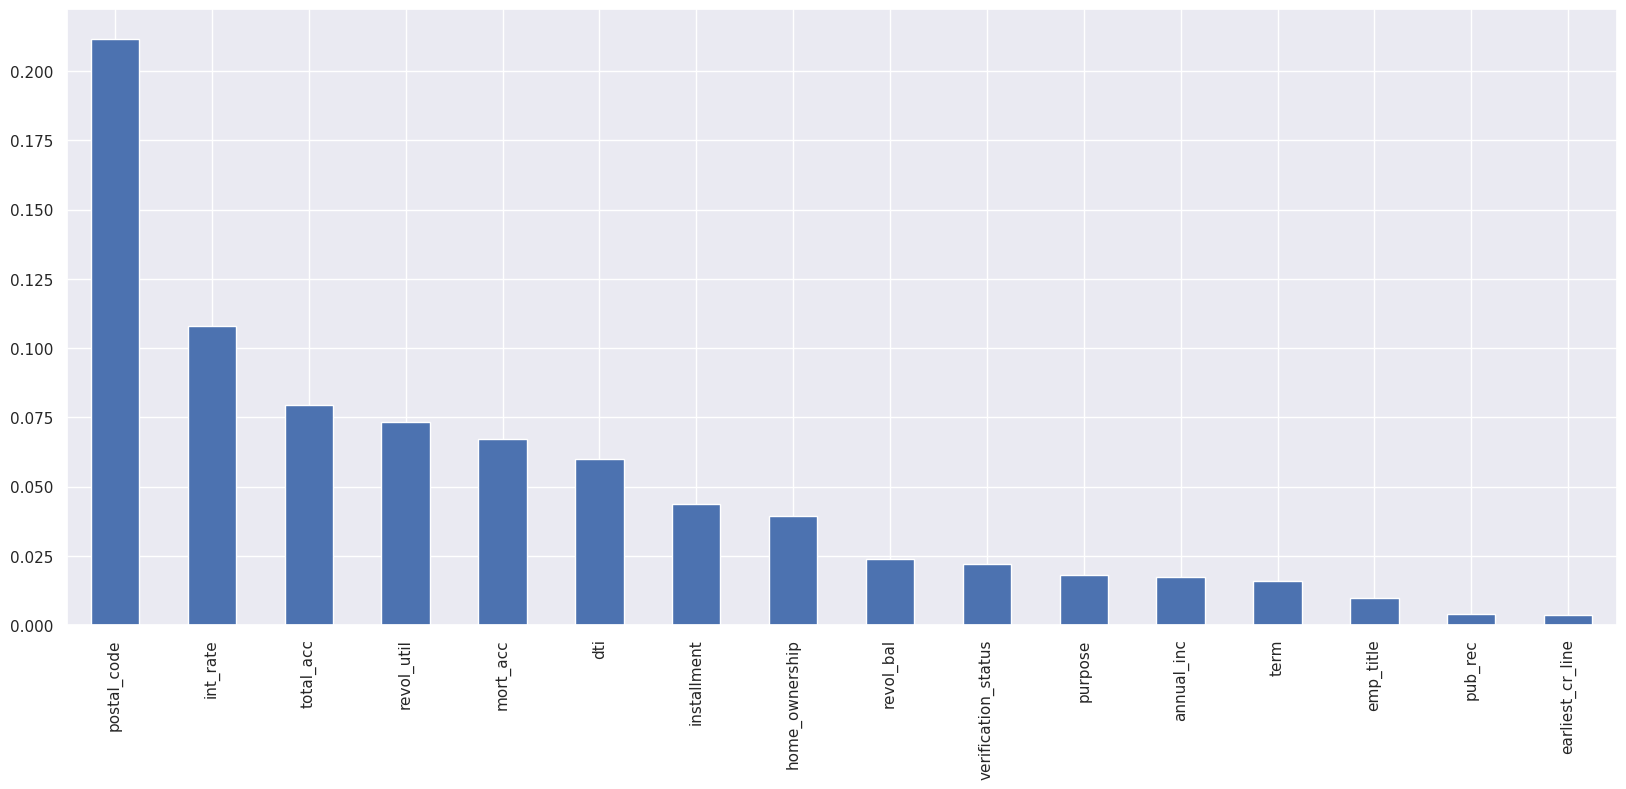

In [121]:
# poting the graph as per values of mutual info per feature
mutual_info.sort_values(ascending= False).plot.bar(figsize=(20,8))

In [122]:
#Looking at the above information we can remove the following columns
x_res.drop(['earliest_cr_line','pub_rec', 'verification_status','annual_inc','purpose','emp_title','postal_code'],axis=1,inplace= True)

## Train Test Split:

In [123]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=123456)

In [124]:
x_res.columns

Index(['term', 'int_rate', 'installment', 'home_ownership', 'dti', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc'],
      dtype='object')

<Axes: >

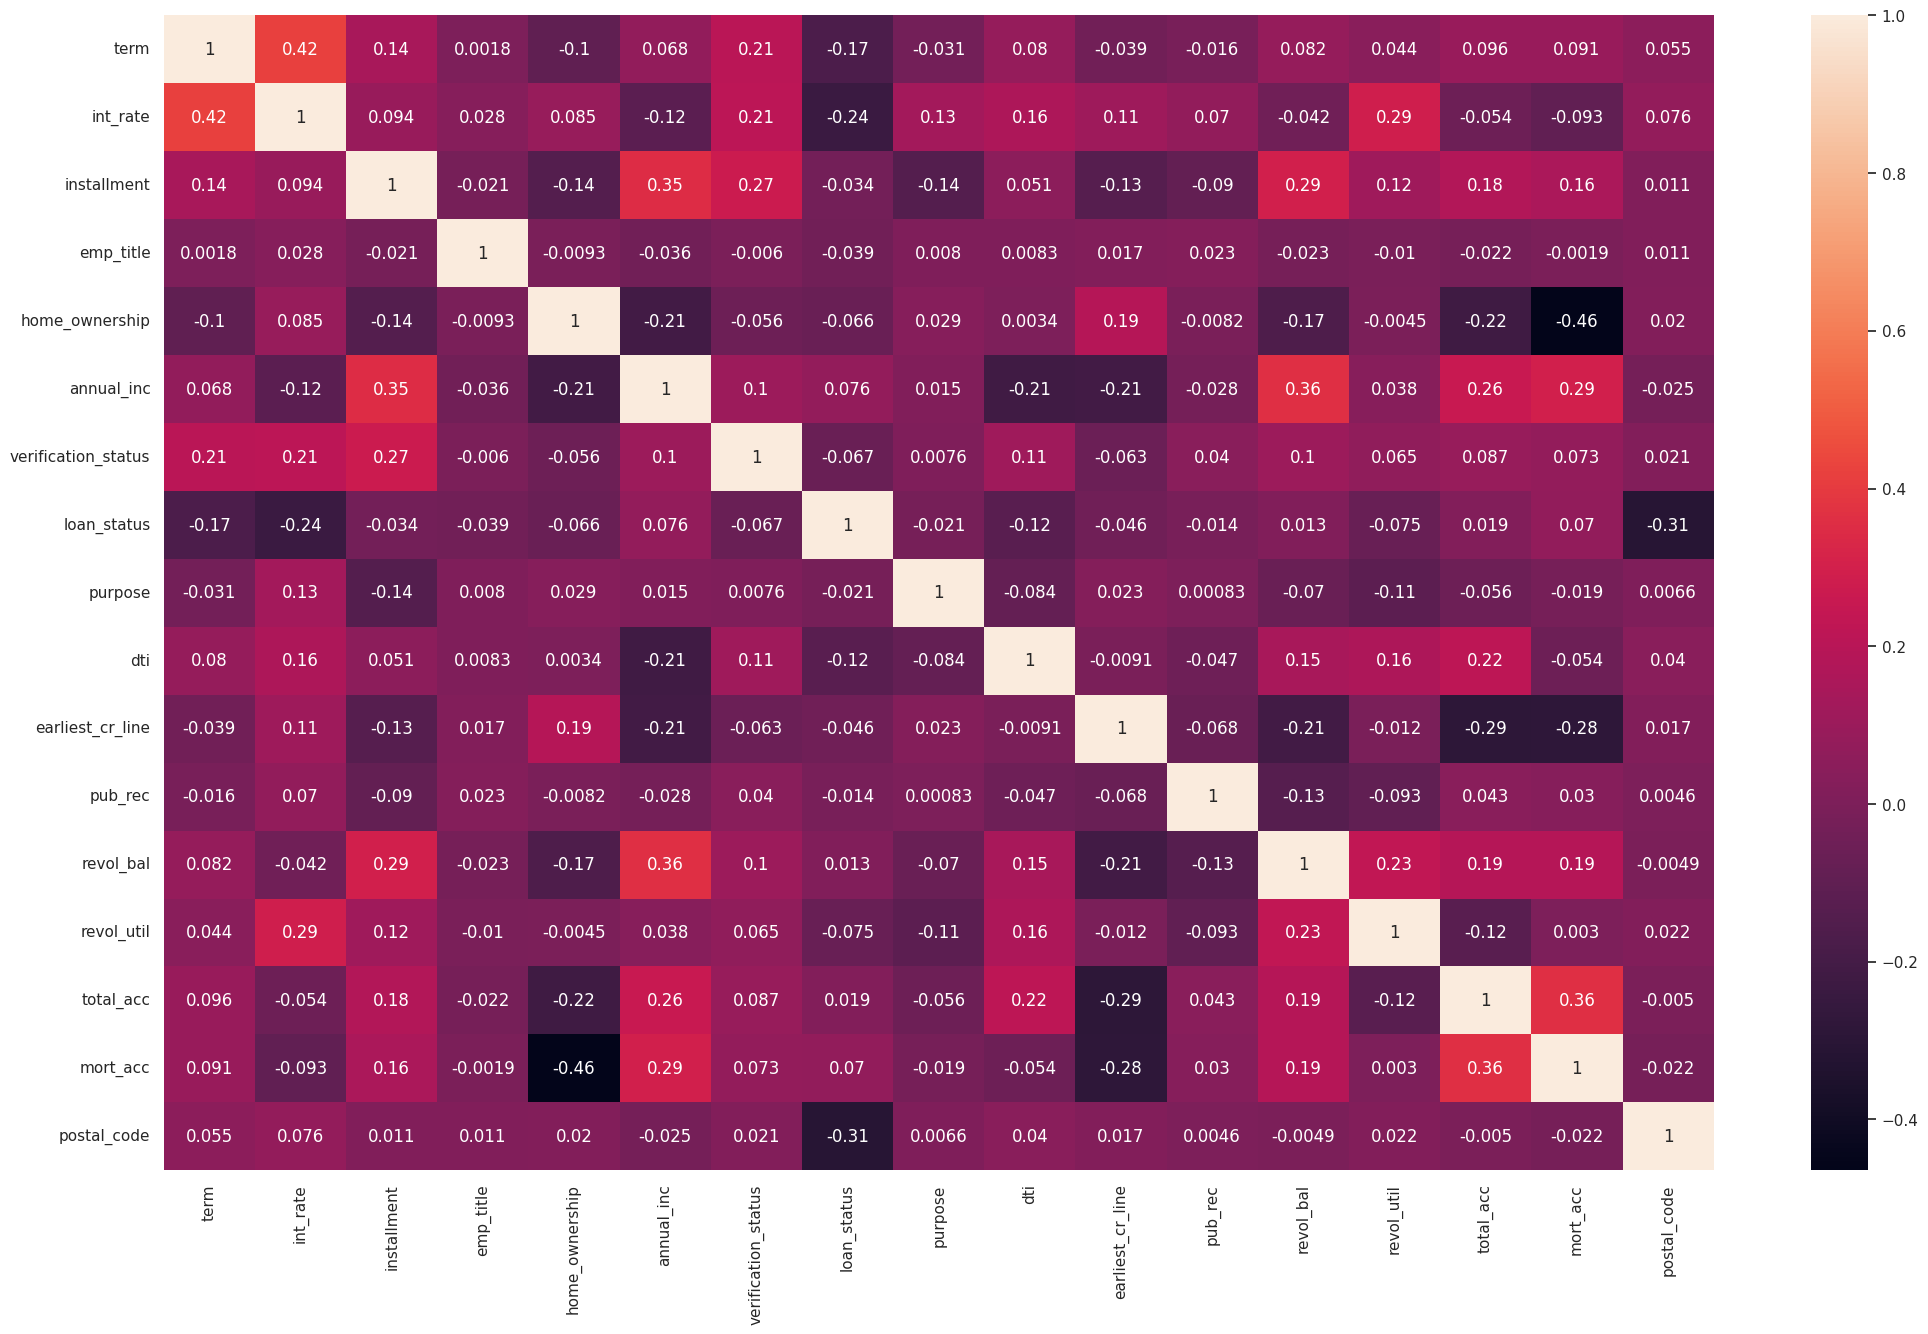

In [125]:
plt.figure(figsize=(25,15))

sns.heatmap(data=df.corr(), annot=True)

## Creating the Model:

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [127]:
algorithams = [LogisticRegression(max_iter= 500),
               RandomForestClassifier(n_estimators=100),
               DecisionTreeClassifier(),
               XGBClassifier()]   

In [128]:
def create_model(x):
    model = x
    model.fit(x_train, y_train)
    y_predictions = model.predict(x_test)
    print(confusion_matrix(y_test,y_predictions))
    print(classification_report(y_test, y_predictions))

In [129]:
for algoritham in algorithams:
    print(f"{algoritham} = ")
    create_model(algoritham)
    print()

LogisticRegression(max_iter=500) = 
[[   78 16074]
 [  200 53895]]
              precision    recall  f1-score   support

           0       0.28      0.00      0.01     16152
           1       0.77      1.00      0.87     54095

    accuracy                           0.77     70247
   macro avg       0.53      0.50      0.44     70247
weighted avg       0.66      0.77      0.67     70247


RandomForestClassifier() = 
[[ 3840 12312]
 [ 1545 52550]]
              precision    recall  f1-score   support

           0       0.71      0.24      0.36     16152
           1       0.81      0.97      0.88     54095

    accuracy                           0.80     70247
   macro avg       0.76      0.60      0.62     70247
weighted avg       0.79      0.80      0.76     70247


DecisionTreeClassifier() = 
[[ 6482  9670]
 [10961 43134]]
              precision    recall  f1-score   support

           0       0.37      0.40      0.39     16152
           1       0.82      0.80      0.81     54

## Selecting Model-

In [130]:
final_model = DecisionTreeClassifier()
final_model.fit(x_train, y_train)

DecisionTreeClassifier()

### save the model to a file:

In [131]:
import pickle

with open('./modeldt.pkl', 'wb') as file:
    pickle.dump(final_model, file)

In [132]:
final_model = XGBClassifier()
final_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [133]:
with open('./modelXgb.pkl', 'wb') as file:
    pickle.dump(final_model, file)

In [134]:
final_model =  RandomForestClassifier()
final_model.fit(x_train, y_train)

RandomForestClassifier()

In [135]:
with open('./modelrfc.pkl', 'wb') as file:
    pickle.dump(final_model, file)

In [136]:
x_train.columns

Index(['term', 'int_rate', 'installment', 'home_ownership', 'dti', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc'],
      dtype='object')

In [137]:
x_train.to_csv('man.csv')

In [138]:
df.to_csv('hello.csv')